In [10]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from merge_data import merge_data
import numpy as np
import pandas as pd
import os
from scipy.stats import linregress


In [11]:
cap_df, con_df = merge_data()

In [28]:
lin_df = pd.merge(cap_df,con_df).dropna()
cap = lin_df['cap_added']
con = lin_df['energy']

In [37]:
e_slope, e_int, e_r, e_p, _std_err = linregress(cap,con)
print('slope: '+ str(e_slope) +' intercept: ' + str(e_int) + ' p: '+str(e_p) )

slope: 0.40457644245783475 intercept: 94.60539972414256 p: 7.678033781806909e-25


<IPython.core.display.Javascript object>


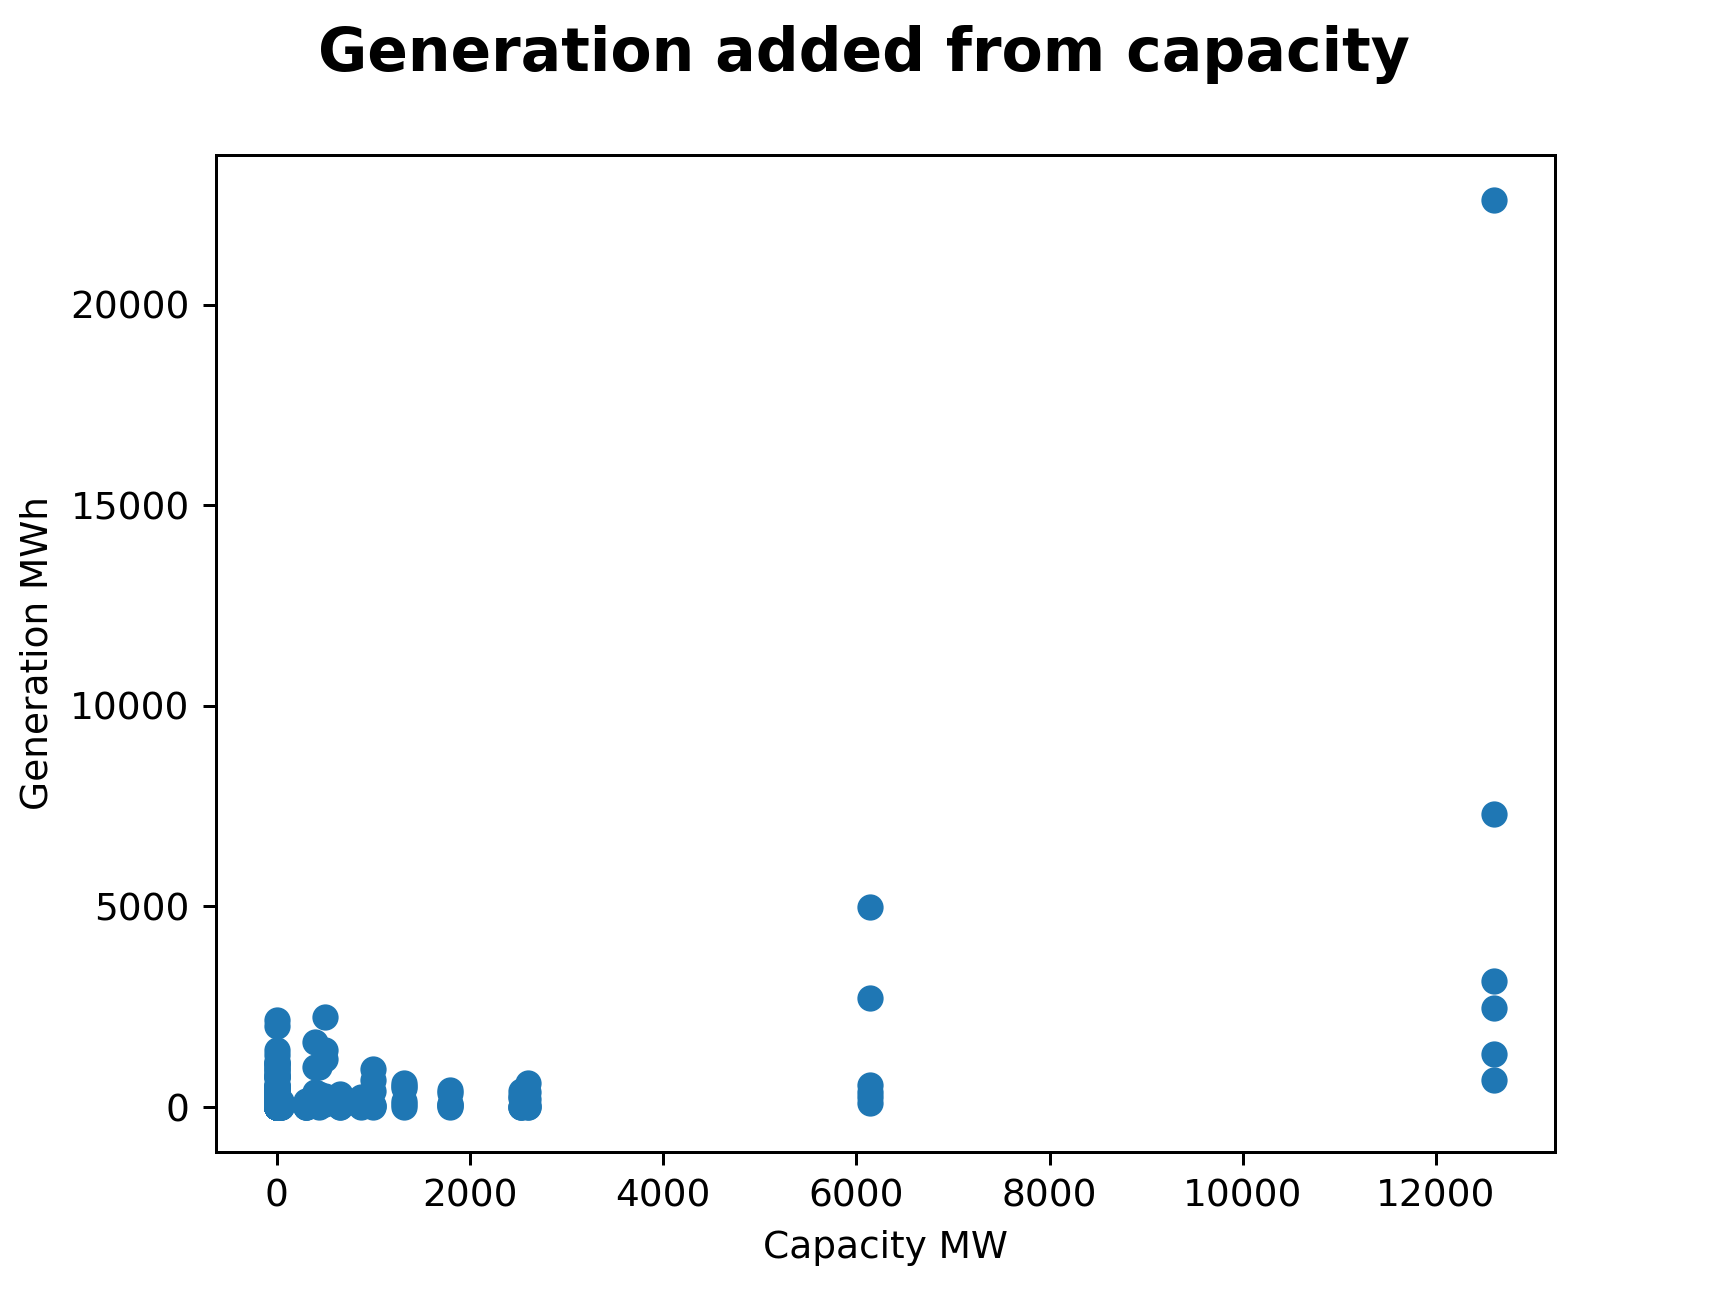

Text(0, 0.5, 'Generation MWh')

In [34]:
# Plot
plt.scatter(cap,con)
plt.suptitle("Generation added from capacity", fontsize=16, fontweight="bold")
plt.xlabel("Capacity MW")
plt.ylabel("Generation MWh")

